# 1. Load the dataset into python environment

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
data=pd.read_csv('titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column# 

In [3]:
data = pd.read_csv('titanic_dataset.csv',index_col = 'PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. Check the basic details of the dataset

In [4]:
#basic details
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
#getting rows and columns (rows,columns)
data.shape

(891, 11)

In [7]:
#getting datatypes
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [8]:
#max, min, avg, median, and percentiles.
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 4. Fill in all the missing values present in all the columns in the dataset

In [10]:

data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [22]:
#null values are present in Age and Cabin
#consider the column Age
data['Age']= data['Age'].fillna(data['Age'].median())


In [23]:
#Consider the column Cabin
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode().loc[0])


In [24]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [25]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    2
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset# 

# 1.Age

Text(0.5, 1.0, 'Analysis of Age')

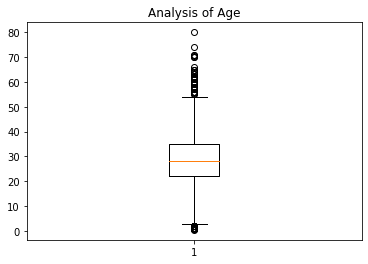

In [26]:
#consider the Age
plt.boxplot(data['Age'])
plt.title('Analysis of Age')

.when analysing the Age , we can find that upper limit and lowerlimt points, 
.for handling outliers have to find IQR

In [27]:
#dividing the data set into quartiler as Q1,Q2,Q3 for finding the IQR,lowerlimit and upper limit
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')
IQR=Q3-Q1
LOWER_LIMIT=Q1-1.5*IQR
UPPER_LIMIT=Q3+1.5*IQR
print('IQR=',IQR)
print('LOWER_LIMIT=',LOWER_LIMIT)
print('UPPER_LIMIT=',UPPER_LIMIT)

IQR= 13.0
LOWER_LIMIT= 2.5
UPPER_LIMIT= 54.5


In [106]:
#removing the values below lower limit and above upper limit

outlier=[]
for x in data['Age']:
    if ((x>UPPER_LIMIT) or (x<LOWER_LIMIT)):
        outlier.append(x)


In [29]:
#Finding the index of the outlier
#lower limit
index1=data['Age']<LOWER_LIMIT
data.loc[index1].index

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

In [30]:
#upper limit
index1=data['Age']>UPPER_LIMIT
data.loc[index1].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [31]:
data.drop([ 8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832,12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],inplace=True)

Text(0.5, 1.0, 'Analysis of Age')

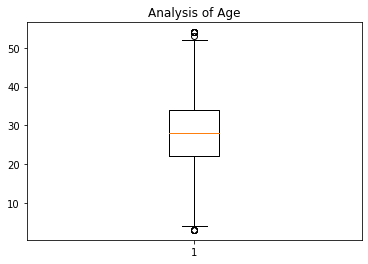

In [33]:
plt.boxplot(data['Age'])
plt.title('Analysis of Age')

# 2.Pclass

Text(0.5, 1.0, 'Analysis of SibSp')

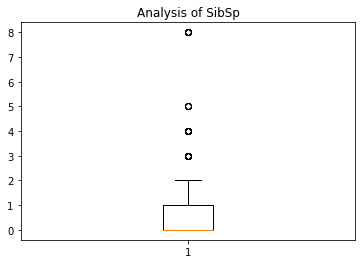

In [40]:
plt.boxplot(data['SibSp'])
plt.title('Analysis of SibSp')

In [41]:
#dividing the data set into quartiler as Q1,Q2,Q3 for finding the IQR,lowerlimit and upper limit
Q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(data['SibSp'],75,interpolation='midpoint')
IQR=Q3-Q1
LOWER_LIMIT=Q1-1.5*IQR
UPPER_LIMIT=Q3+1.5*IQR
print('IQR=',IQR)
print('LOWER_LIMIT=',LOWER_LIMIT)
print('UPPER_LIMIT=',UPPER_LIMIT)

IQR= 1.0
LOWER_LIMIT= -1.5
UPPER_LIMIT= 2.5


In [52]:
#,removing the values below lower limit and above upper limit

outlier=[]
for x in data['SibSp']:
    if ((x>UPPER_LIMIT) or (x<LOWER_LIMIT)):
        outlier.append(x)    

In [48]:
#Finding the index of the outlier
#lower limit
index1=data['SibSp']<LOWER_LIMIT
data.loc[index1].index

Int64Index([], dtype='int64', name='PassengerId')

In [53]:
#Finding the index of the outlier
#upper limit
index1=data['SibSp']>UPPER_LIMIT
data.loc[index1].index

Int64Index([ 25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [55]:
data.drop([25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864],inplace=True)

Text(0.5, 1.0, 'Analysis of SibSp')

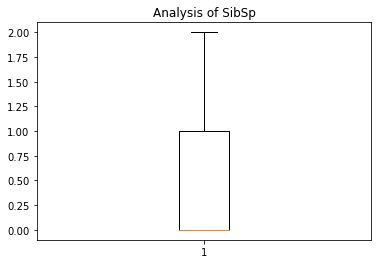

In [56]:
#boxplot after handling the outliers
plt.boxplot(data['SibSp'])
plt.title('Analysis of SibSp')

# Parch

Text(0.5, 1.0, 'Analysis of Fare ')

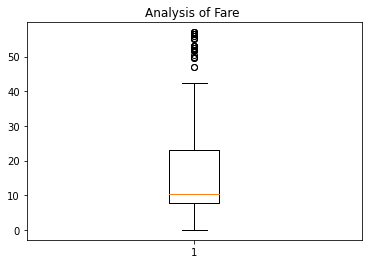

In [97]:
plt.boxplot(data['Fare'])
plt.title('Analysis of Fare ')

In [98]:
#dividing the data set into quartiler as Q1,Q2,Q3 for finding the IQR,lowerlimit and upper limit
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')
IQR=Q3-Q1
LOWER_LIMIT=Q1-1.5*IQR
UPPER_LIMIT=Q3+1.5*IQR
print('IQR=',IQR)
print('LOWER_LIMIT=',LOWER_LIMIT)
print('UPPER_LIMIT=',UPPER_LIMIT)

IQR= 15.270800000000001
LOWER_LIMIT= -15.052000000000003
UPPER_LIMIT= 46.0312


In [99]:
#removing the values below lower limit and above upper limit

outlier=[]
for x in data['Fare']:
    if ((x>UPPER_LIMIT) or (x<LOWER_LIMIT)):
        outlier.append(x)       

In [100]:
#finding the  lower limit values 
index1=data['Fare']<LOWER_LIMIT
data.loc[index1].index

Int64Index([], dtype='int64', name='PassengerId')

In [101]:
#finding the upper limit values 
index1=data['Fare']>UPPER_LIMIT
data.loc[index1].index

Int64Index([  4,   7,  36,  75,  84, 111, 138, 167, 170, 186, 249, 310, 357,
            371, 384, 435, 458, 476, 510, 540, 572, 578, 600, 622, 644, 670,
            672, 679, 691, 693, 711, 713, 725, 749, 782, 810, 827, 839, 868,
            872],
           dtype='int64', name='PassengerId')

In [102]:
data.drop([ 4,   7,  36,  75,  84, 111, 138, 167, 170, 186, 249, 310, 357,
            371, 384, 435, 458, 476, 510, 540, 572, 578, 600, 622, 644, 670,
            672, 679, 691, 693, 711, 713, 725, 749, 782, 810, 827, 839, 868,
            872],inplace=True)

Text(0.5, 1.0, 'Analysis of Fare ')

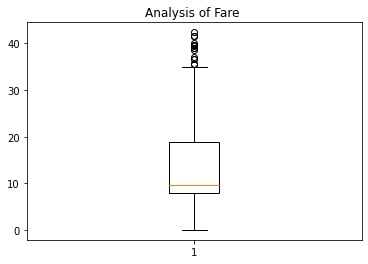

In [103]:
plt.boxplot(data['Fare'])
plt.title('Analysis of Fare ')

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [104]:
#min_max Scaling
X = pd.DataFrame(data['Survived'])
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
X = min_max.fit_transform(X)
X= pd.DataFrame(X)

In [105]:
X.describe()

,0
count,643.000000
mean,0.318818
std,0.466381
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000
